### **Implementation of Sentimental Analysis using LSTM**

In [23]:
#importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [24]:
reviews = pd.read_csv('IMDB Dataset.csv')
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
	
reviews['sentiment'] = np.where(reviews['sentiment'] == 'positive', 1, 0)

In [26]:
sentences = reviews['review'].to_numpy()
labels = reviews['sentiment'].to_numpy()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (37500,)
Training Data Output Shape:  (37500,)
Testing Data Input Shape:  (12500,)
Testing Data Output Shape:  (12500,)


In [28]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [29]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  37500
Number of Words:  10000


In [30]:
tokenizer.word_counts

OrderedDict([('blondell', 49),
             ('farrell', 78),
             ('are', 44174),
             ('excellent', 3048),
             ('was', 71658),
             ('edible', 5),
             ('this', 113579),
             ('very', 20914),
             ('funny', 6512),
             ('and', 244797),
             ('i', 115685),
             ('laughed', 575),
             ('often', 2368),
             ('throughout', 2009),
             ('it', 117680),
             ('great', 13577),
             ('dialogue', 2301),
             ('its', 12085),
             ('loaded', 121),
             ('with', 65924),
             ('wisecracks', 33),
             ("could've", 265),
             ('watched', 3333),
             ('for', 66206),
             ('hours', 1477),
             ('tremendous', 189),
             ('fun', 4054),
             ('to', 201922),
             ('watch', 10493),
             ('a', 243898),
             ('serial', 526),
             ('killer', 1920),
             ('carl', 194

In [31]:
tokenizer.word_docs

defaultdict(int,
            {'to': 35270,
             'its': 7695,
             'and': 36231,
             'hours': 1318,
             'very': 12959,
             'fun': 3224,
             'wisecracks': 33,
             'dialogue': 1983,
             'loaded': 117,
             'watch': 8184,
             'it': 31960,
             'funny': 4747,
             'often': 2062,
             'are': 20778,
             'for': 26773,
             'throughout': 1846,
             'excellent': 2659,
             'watched': 2966,
             'this': 34021,
             'farrell': 64,
             'edible': 5,
             'blondell': 30,
             'i': 28784,
             'laughed': 537,
             'tremendous': 181,
             'with': 26116,
             'great': 9443,
             'was': 24195,
             "could've": 235,
             'mill': 123,
             'despair': 125,
             'involving': 665,
             'class': 1088,
             'rap': 122,
             'depressing

In [32]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])

[9409, 6832, 24, 322, 9409, 14, 1, 12, 14, 53, 156, 3, 11, 1441, 402, 475, 10, 81, 412, 3, 92, 4982, 17, 1, 11, 2720, 294, 10, 16, 631, 3523, 247, 6, 104]


In [33]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [34]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [35]:
model = Sequential()

In [36]:
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))

In [37]:
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))

In [38]:
model.add(Dense(10, activation='relu'))

In [39]:
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
from gc import callbacks


history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)

Epoch 1/10
1172/1172 [==============================] - 116s 94ms/step - loss: 0.4257 - accuracy: 0.7967 - val_loss: 0.3342 - val_accuracy: 0.8637
Epoch 2/10
1172/1172 [==============================] - 113s 96ms/step - loss: 0.2783 - accuracy: 0.8907 - val_loss: 0.3412 - val_accuracy: 0.8482
Epoch 3/10
1172/1172 [==============================] - 116s 99ms/step - loss: 0.2314 - accuracy: 0.9114 - val_loss: 0.3259 - val_accuracy: 0.8595
Epoch 4/10
1172/1172 [==============================] - 118s 101ms/step - loss: 0.1971 - accuracy: 0.9259 - val_loss: 0.3502 - val_accuracy: 0.8646
Epoch 5/10
1172/1172 [==============================] - 114s 97ms/step - loss: 0.1742 - accuracy: 0.9369 - val_loss: 0.4200 - val_accuracy: 0.8588
Epoch 6/10
1172/1172 [==============================] - 108s 92ms/step - loss: 0.1520 - accuracy: 0.9451 - val_loss: 0.4096 - val_accuracy: 0.8615
Epoch 7/10
1172/1172 [==============================] - 111s 95ms/step - loss: 0.1384 - accuracy: 0.9517 - val_loss: 

In [44]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.425740  0.796720  0.334188       0.86368
1  0.278280  0.890667  0.341220       0.84816
2  0.231422  0.911440  0.325870       0.85952
3  0.197126  0.925893  0.350203       0.86456
4  0.174200  0.936880  0.419956       0.85880
5  0.152009  0.945120  0.409632       0.86152
6  0.138410  0.951707  0.397742       0.85344
7  0.125357  0.956613  0.529869       0.85568
8  0.100196  0.966480  0.561466       0.82536
9  0.080179  0.973493  0.541879       0.83736


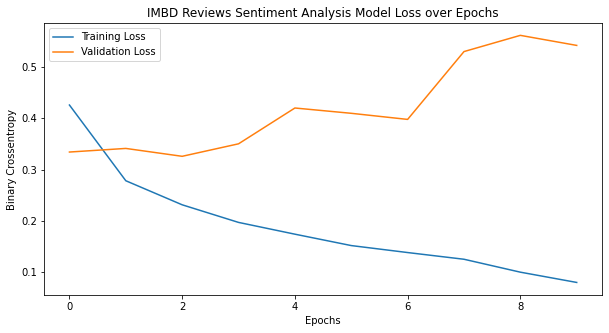

In [45]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('IMBD Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

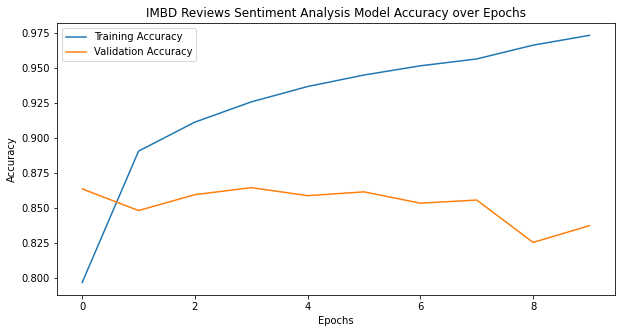

In [46]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('IMBD Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()